<a href="https://colab.research.google.com/github/michelDol/mineriaDatos/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Universidad Juárez del Estado de Durango
## Facultad de Ciencias Exactas

# Proyecto Final

## Proyecto de Minería de Datos Aplicando CRISP-DM

**Curso:** Minería de Datos

**Estudiante:** Ing. Michel Margarita Dolores Avalos

**Institución:** Facultad de Ciencias Exactas

**Fecha:** 20-Febrero-2026

## 1. Comprensión del Negocio (Business Understanding)

La deserción escolar representa un problema dentro se la educacion superior, ya que genera:


*   Afectaciones sociales y profesionales.
*   Impacto económico en estudiantes.

El dataset proviene de una institución de educación superior en Portugal, dentro de un proyecto nacional orientado a combatir el abandono académico mediante intervención temprana.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve, auc,
    classification_report,
    confusion_matrix
)

## 2. Comprensión de los Datos (Data Understanding)

### **DATASET:**
Se cargó el conjunto de datos utilizando la librería Pandas. La inspección inicial permitió visualizar la estructura y confirmar la presencia de la variable objetivo.



In [ ]:

# Configuración visual
plt.rcParams["figure.figsize"] = (8,5)
sns.set(style="whitegrid")

# Cargar dataset
df = pd.read_csv("students_dropout_academic_success.csv")

# Visualizar primeras filas
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


El dataset contiene 4424 registros y 37 variables, lo que permite realizar análisis estadísticos robustos.

Se verificó que no existen valores faltantes, lo cual simplifica la fase de preparación. Las variables incluyen tanto datos numéricos como categóricos codificados.


In [ ]:
df.shape

(4424, 37)

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

,0
Marital Status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


Se identificó un desequilibrio de clases, siendo “Graduate” la clase mayoritaria y “Enrolled” la minoritaria. Este desequilibrio puede afectar el desempeño de los modelos predictivos, favoreciendo la clase dominante.

Ademas, se observaron correlaciones altas entre variables académicas del mismo semestre.

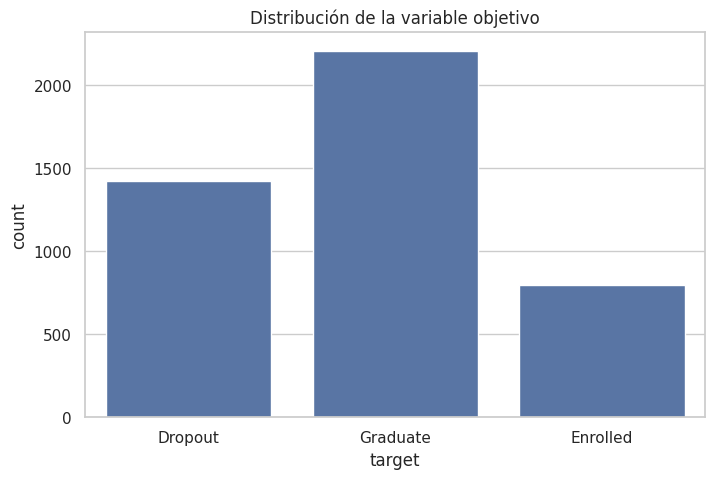

In [ ]:
df['target'].value_counts()

sns.countplot(data=df, x='target')
plt.title("Distribución de la variable objetivo")
plt.show()

In [52]:

# Crear una copia del DataFrame para no modificar el original
df_encoded = df.copy()

# Inicializar LabelEncoder
le = LabelEncoder()
le.fit(df['target'])

#Codificacion de clases
print(le.classes_)

# Aplicar LabelEncoder a la columna 'target'
df_encoded['target_encoded'] = le.fit_transform(df_encoded['target'])

# Calcular la correlación de todas las columnas numéricas con la 'target_encoded'
correlations = df_encoded.corr(numeric_only=True)['target_encoded'].sort_values(ascending=False)

# Mostrar las correlaciones
print("Correlación de las características numéricas con la variable objetivo codificada:")
print(correlations)

['Dropout' 'Enrolled' 'Graduate']
Correlación de las características numéricas con la variable objetivo codificada:
target_encoded                                    1.000000
Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Admission grade                                   0.120889
Displaced                                         0.113986
Previous qualification (grade)                    0.103764
Curricular units 2nd sem (evaluations)            0.092721
Application order                                 0.089791
Daytime/evening attendance                        0.075107

## 3. Preparación de los Datos (Data Preparation)

En esta fase se realizaron las siguientes acciones:

1. Separación de la variable objetivo.

2. Codificación de la variable objetivo mediante Label Encoding.

3. División del conjunto de datos en entrenamiento (60%), validación (20%) y prueba (20%).

La división estratificada fue fundamental para mantener la representatividad del conjunto original, especialmente debido al desbalance de clases.


In [ ]:
#Separación de variables
X = df.drop("target", axis=1)
y = df["target"]

#Codificación de la variable objetivo
y = le.fit_transform(y)

In [ ]:
# Primera división: 60% train, 40% temporal
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42,
    stratify=y
)

# Segunda división: 20% validación, 20% prueba
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print("Train:", np.bincount(y_train))
print("Validation:", np.bincount(y_val))
print("Test:", np.bincount(y_test))

Train: [ 853  476 1325]
Validation: [284 159 442]
Test: [284 159 442]


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## 4. Modelación (Modeling)

En esta fase se implementaron cinco modelos de clasificación supervisada con el objetivo de comparar su desempeño predictivo en el conjunto de validación.

Los modelos seleccionados fueron:

* Regresión Logística Multinomial

* Random Forest

* Árbol de Decisión

* K-Nearest Neighbors (KNN)

* Support Vector Machine (SVM)

La comparación se realizó utilizando las siguientes métricas:

* Accuracy

* Precision macro

* Recall macro

* F1-score macro

* ROC-AUC multiclase (One-vs-Rest)



In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000,
    solver='lbfgs'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True, random_state=42)
}

In [ ]:
results = []

for name, model in models.items():

    # Escalado solo para modelos que lo necesitan
    if name in ["Logistic Regression", "KNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)
        y_prob = model.predict_proba(X_val_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_prob = model.predict_proba(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average="macro")
    recall = recall_score(y_val, y_pred, average="macro")
    f1 = f1_score(y_val, y_pred, average="macro")
    roc_auc = roc_auc_score(y_val, y_prob, multi_class="ovr")

    results.append([name, accuracy, precision, recall, f1, roc_auc])

In [ ]:
results_df = pd.DataFrame(results, columns=[
    "Modelo",
    "Accuracy",
    "Precision (Macro)",
    "Recall (Macro)",
    "F1-Score (Macro)",
    "ROC-AUC (OvR)"
])

results_df.sort_values(by="F1-Score (Macro)", ascending=False)

,Modelo,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro),ROC-AUC (OvR)
0,Logistic Regression,0.771751,0.719431,0.687252,0.697056,0.885285
1,Random Forest,0.772881,0.722016,0.675758,0.685168,0.891324
4,SVM,0.754802,0.697053,0.663271,0.672933,0.876732
2,Decision Tree,0.681356,0.624050,0.622892,0.622448,0.730265
3,KNN,0.663277,0.596855,0.589935,0.592696,0.781846


## 5. Evaluación (Evaluation)

Aunque Random Forest obtuvo el mayor Accuracy (0.7729) y el mejor ROC-AUC (0.8913), la Regresión Logística presentó el mejor F1-Score macro (0.6971).

Dado que el problema presenta desequilibrio de clases, el F1-Score macro se considera la métrica más adecuada para la selección del modelo, ya que:

* Equilibra Precision y Recall

* Evalúa el rendimiento promedio en todas las clases

* Penaliza errores en clases minoritarias

Por esta razón, se seleccionó el modelo de Regresión Logística como modelo final del proyecto.

In [ ]:
best_model = LogisticRegression(max_iter=3000,
    solver='lbfgs')
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       284
           1       0.44      0.25      0.31       159
           2       0.78      0.92      0.85       442

    accuracy                           0.75       885
   macro avg       0.67      0.64      0.64       885
weighted avg       0.72      0.75      0.73       885



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


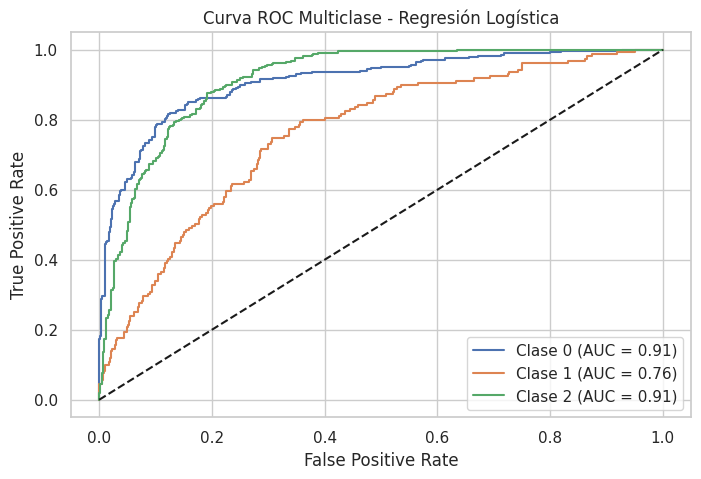

In [40]:
# Binarizar las clases (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]

# Obtener probabilidades
y_score = best_model.predict_proba(X_test)

# Calcular curva ROC y AUC por clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC Multiclase - Regresión Logística")
plt.legend()
plt.show()

El modelo presenta un desempeño global aceptable con una precisión del 75%. Sin embargo, el análisis por clase revela diferencias significativas.

El modelo predice con alta efectividad la graduación y la deserción, pero presenta limitaciones en la identificación de estudiantes que permanecen inscritos.

El bajo recall en la clase 1 indica que muchos estudiantes que continúan matriculados son clasificados incorrectamente como abandono o graduación.

Este comportamiento es común en problemas con clases intermedias menos definidas o con menor representación.

## 6. Implementación / Despliegue (Deployment)
Para simular el despliegue del modelo, se desarrolló una función predictiva que permite ingresar los datos de un estudiante y obtener la probabilidad asociada a cada posible resultado académico. Esto demuestra la aplicabilidad práctica del modelo en un entorno institucional.

In [49]:
def predict_student(data):
    """
    data: lista o array con las características del estudiante
    """
    data_scaled = scaler.transform([data])
    prediction = best_model.predict(data_scaled)
    probabilities = best_model.predict_proba(data_scaled)

    return prediction[0], probabilities[0]


nuevo_estudiante = X_test.iloc[0].values
pred, prob = predict_student(nuevo_estudiante)

print("Predicción:", pred)
print("Probabilidades:", prob)



Predicción: 2
Probabilidades: [0.18097498 0.2692724  0.54975262]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Conclusiones:**

La codificación de clases es:

0 → Abandono

1 → Permanece inscrito

2 → Graduado

Entonces el modelo está diciendo:

El estudiante tiene mayor probabilidad de graduarse (54.97%)

## 7. Referencias Bibliográficas

* Kaggle. (2024). Student dropout and academic success dataset. Kaggle. https://www.kaggle.com/

* Breiman, L. (2001). Random forests. Machine Learning, 45(1), 5–32. https://doi.org/10.1023/A:1010933404324

* Cortes, C., & Vapnik, V. (1995). Support-vector networks. Machine Learning, 20(3), 273–297. https://doi.org/10.1007/BF00994018

* Fawcett, T. (2006). An introduction to ROC analysis. Pattern Recognition Letters, 27(8), 861–874. https://doi.org/10.1016/j.patrec.2005.10.010

* Powers, D. M. W. (2011). Evaluation: From precision, recall and F-measure to ROC, informedness, markedness and correlation. Journal of Machine Learning Technologies, 2(1), 37–63.

---